In [1]:
# Philip Walsh
# philipwalsh.ds@gmail.com
# 2019-12-20
# Starter notebook can be used as a jumping off point to the challenge
# Kaggle - House Prices: Advanced Regression Techniques
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques


In [2]:
# complete_train_data  : training.csv (provided, contains SalePrice)
# X_train              : 80% of the training data - for fitting the model
# X_hold_out           : 20% of the training data - for evaluating the model on unseen data
# submissions_data     : test.csv (provided, does not contain SalePrice)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [4]:
save_intermediate_work = True

In [5]:
def best_fit(X, Y):
    # to plot the line of best fit
    # https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
    # aziz alto
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

In [6]:
##usage
##best fit line:
##y = 0.80 + 0.92x
#
#a, b = best_fit(X, Y)
#
## plot points and fit line
#plt.scatter(X, Y)
#yfit = [a + b * xi for xi in X]
#plt.plot(X, yfit)

In [7]:
complete_train_data = pd.read_csv('excluded/train.csv', low_memory=False)

In [8]:
complete_train_data.shape

(1460, 81)

In [9]:
complete_train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

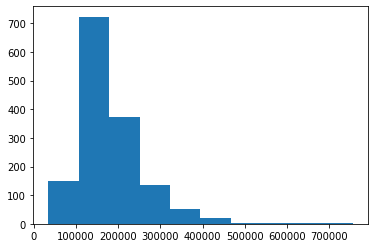

In [10]:
# SalePrice is what we are being asked to predict
# so lets havea quick look 
plt.hist(complete_train_data['SalePrice'])

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

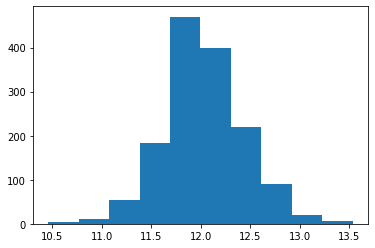

In [11]:
plt.hist(np.log(complete_train_data['SalePrice']))

In [12]:
complete_train_data['LotFrontage'].fillna(complete_train_data['LotFrontage'].mean(), inplace=True)

best fit line:
y = 96299.76 + 1208.02x


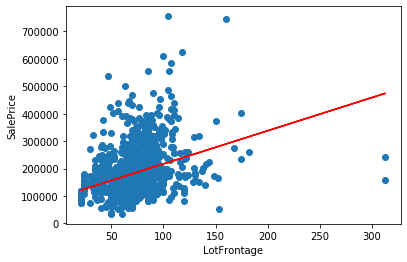

In [13]:
#scatter plot of LotFrontage vs SalePrice
# add in line of best fit as well
X = complete_train_data['LotFrontage']
Y = complete_train_data['SalePrice']
a, b = best_fit(X, Y)

# plot points and fit line
plt.scatter(X, Y)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit, color='red')

(array([205., 902., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <a list of 10 Patch objects>)

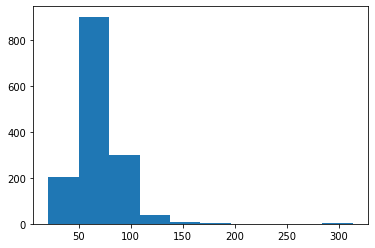

In [14]:
plt.hist(complete_train_data['LotFrontage'])

best fit line:
y = 18569.03 + 107.13x


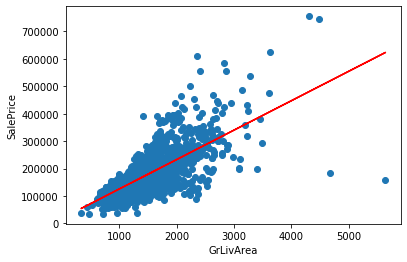

In [15]:
X = complete_train_data['GrLivArea']
Y = complete_train_data['SalePrice']
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit, color='red')

{'whiskers': [<matplotlib.lines.Line2D at 0x2a3cd6ceb88>,
 'caps': [<matplotlib.lines.Line2D at 0x2a3cd6d3b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a3cd5aa688>],
 'medians': [<matplotlib.lines.Line2D at 0x2a3cd6d5ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a3cd6d5bc8>],
 'means': []}

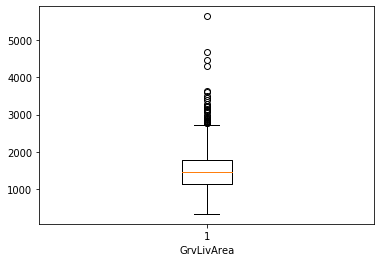

In [16]:
plt.xlabel('GrvLivArea')
plt.boxplot(complete_train_data['GrLivArea'])

In [17]:
##
## pull in the "test.csv" so we can do some feature engineering and data cleaning
##

In [18]:
# pull in the submission data, aka the test data
# we will merge the train/test data into one large set, for cleaning purposes
submission_data = pd.read_csv('excluded/test.csv', low_memory=False)

In [19]:
submission_data.shape

(1459, 80)

In [20]:
submission_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [21]:
##
## steps will be
##  Split up the train data into train/hold_out
##  Tag all 3 sets with a variable that identifies their purpose
##  Combine all 3 sets train+hold_out+submission(aka test)
##

In [22]:
# set up bins for the stratified split
complete_train_data['living_area_cat'] = pd.cut(
    complete_train_data['GrLivArea'], 
    bins=[0, 500, 1000, 1500, 2000, 2500, np.inf], 
    labels=[1, 2, 3, 4, 5, 6])

In [23]:
complete_train_data[['SalePrice','GrLivArea','living_area_cat']].head()

,SalePrice,GrLivArea,living_area_cat
0,208500,1710,4
1,181500,1262,3
2,223500,1786,4
3,140000,1717,4
4,250000,2198,5


In [24]:
split = StratifiedShuffleSplit(n_splits=1, test_size=.20, random_state=9261774)
for train_index, hold_out_index in split.split(complete_train_data, complete_train_data['living_area_cat']):
    X_train = complete_train_data.iloc[train_index].copy() # this is the training data
    X_hold_out = complete_train_data.iloc[hold_out_index].copy()   # this is the hold out, the protion of the training i will use for testing

In [25]:
## next we save the SalePrice, remove it from the train/hold_out set

In [26]:
# set up the label/expected/y variable
y_train = X_train['SalePrice']
y_hold_out = X_hold_out['SalePrice']


In [27]:
# drop SalePrice from the x vars
X_train.drop('SalePrice', axis=1, inplace=True)
X_hold_out.drop('SalePrice', axis=1, inplace=True)

In [28]:
# done with the living_area_cat
X_train.drop('living_area_cat', axis=1, inplace=True)
X_hold_out.drop('living_area_cat', axis=1, inplace=True)
complete_train_data.drop('living_area_cat', axis=1, inplace=True)

In [29]:
# create a new TRAIN field to keep the different data sets from getting mixed up
X_train['TRAIN']=1          # 1 indicates its from the training data
X_hold_out['TRAIN']=0       # 0 indicates its hold-out
submission_data['TRAIN']=-1 #-1 for the submissions data

In [30]:
X_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TRAIN
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0
mean,727.526541,57.731164,69.813734,10429.298801,6.108733,5.544521,1971.216610,1984.610445,101.162069,432.920377,...,91.550514,47.077055,21.976027,3.849315,14.579623,3.448630,30.217466,6.309075,2007.796233,1.0
std,422.163686,42.805809,22.652095,9765.147285,1.379614,1.080990,30.380029,20.648977,175.180877,451.398873,...,123.408091,67.054589,61.509875,31.049087,55.618241,44.896939,298.489802,2.677691,1.327161,0.0
min,2.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,1.0
25%,361.750000,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1966.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,1.0
50%,730.500000,50.000000,70.049958,9468.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,372.500000,...,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,1.0
75%,1083.250000,70.000000,79.000000,11532.750000,7.000000,6.000000,2000.000000,2004.000000,160.000000,698.250000,...,168.000000,68.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.0
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000,1.0


In [31]:
X_hold_out.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TRAIN
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.0
mean,742.393836,53.561644,70.994856,10866.945205,6.061644,5.698630,1971.472603,1985.886986,113.708904,486.517123,...,105.020548,44.993151,21.866438,1.650685,16.986301,0.0,96.575342,6.373288,2007.893836,0.0
std,419.898653,40.113494,19.315176,10813.345447,1.398195,1.226118,29.534113,20.634878,202.785451,472.796378,...,132.454231,63.043921,59.634102,20.960474,56.365643,0.0,934.470788,2.809111,1.331238,0.0
min,1.000000,20.000000,21.000000,1533.000000,2.000000,2.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,2006.000000,0.0
25%,372.000000,20.000000,60.000000,7748.000000,5.000000,5.000000,1952.750000,1967.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,2007.000000,0.0
50%,749.000000,50.000000,70.049958,9496.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,434.000000,...,50.500000,23.500000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,2008.000000,0.0
75%,1121.000000,60.000000,79.000000,11764.750000,7.000000,7.000000,2000.250000,2004.000000,180.000000,762.250000,...,180.500000,65.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,2009.000000,0.0
max,1450.000000,190.000000,152.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,2260.000000,...,670.000000,406.000000,330.000000,320.000000,396.000000,0.0,15500.000000,12.000000,2010.000000,0.0


In [32]:
submission_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TRAIN
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705,-1.0
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740,0.0
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,-1.0
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,-1.0
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,-1.0
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,-1.0
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,-1.0


In [33]:
combined=pd.concat([X_train, X_hold_out, submission_data],sort=False)

In [34]:
combined.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TRAIN
count,2919.000000,2919.000000,2692.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.377392,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,-0.099692
std,842.787043,42.517628,22.194138,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,0.943574
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,-1.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,-1.000000
50%,1460.000000,50.000000,70.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,1.000000


In [35]:
combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TRAIN
841,842,70,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,1
124,125,20,RL,48.0,17043,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,1
213,214,20,RL,43.0,13568,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,1
577,578,80,RL,96.0,11777,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Abnorml,1
1226,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,1


In [36]:
combined.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TRAIN
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,-1
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,-1
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,-1
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,-1
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,-1


In [37]:
# look for missing data
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.max_rows', None)
combined[['OverallQual','OverallCond','LotFrontage']].isna().any()

OverallQual    False
OverallCond    False
LotFrontage     True
dtype: bool

In [38]:
def CleanData(df_in):
    # lotFrontage was identified as a column with missing data
    # let's do a quick fill
    df_clean = df_in.copy()
    temp_mean = df_clean['LotFrontage'].mean()
    temp_mean
    df_clean['LotFrontage'].fillna(temp_mean, inplace=True)
    
    # multiply the condition and quality to create a new variable
    df_clean['OverallQualCond'] = (df_clean['OverallQual']+1) * (df_clean['OverallCond']+1)
    df_clean.drop('OverallQual',axis=1, inplace=True)
    df_clean.drop('OverallCond',axis=1, inplace=True)
    
    #create a centered LotFrontage
    df_clean['LotFrontageCtr']=df_clean['LotFrontage']-temp_mean
    
    #create a normalized LotFrontage
    df_clean['LotFrontageNorm']=(df_clean['LotFrontage']-df_clean['LotFrontage'].min())/(df_clean['LotFrontage'].max()-df_clean['LotFrontage'].min())
    
    return df_clean

In [39]:
combined = CleanData(combined)

In [40]:
combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TRAIN,OverallQualCond,LotFrontageCtr,LotFrontageNorm
841,842,70,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,0,6,2008,WD,Normal,1,54,-9.377392,0.133562
124,125,20,RL,48.0,17043,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,1,2009,WD,Normal,1,42,-21.377392,0.092466
213,214,20,RL,43.0,13568,Pave,NaN,IR2,Lvl,AllPub,...,NaN,0,7,2006,WD,Normal,1,36,-26.377392,0.075342
577,578,80,RL,96.0,11777,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,5,2006,WD,Abnorml,1,42,26.622608,0.256849
1226,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,1,2008,WD,Normal,1,42,16.622608,0.222603


In [41]:
##
## data is clean, features engineered
## time to ripe the sets apart again, and do some modeling

In [42]:
# train - use to fit models
X_train = combined[combined['TRAIN']==1].copy()
X_train.drop('TRAIN', axis=1, inplace=True)

# sendtofile(excluded_dir, 'X_train.csv', X_train, verbose=True)


# hold_out - use to evaluate model performance
X_hold_out = combined[combined['TRAIN']==0].copy()
X_hold_out.drop('TRAIN', axis=1, inplace=True)

# submission - use to submit the final answer for the kaggle cometition
X_submission = combined[combined['TRAIN']==-1].copy()
X_submission.drop('TRAIN', axis=1, inplace=True)

In [43]:
X_train.shape

(1168, 81)

In [44]:
X_hold_out.shape

(292, 81)

In [45]:
X_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,OverallQualCond,LotFrontageCtr,LotFrontageNorm
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,727.526541,57.731164,69.813734,10429.298801,1971.216610,1984.610445,101.162069,432.920377,45.830479,575.265411,...,21.976027,3.849315,14.579623,3.448630,30.217466,6.309075,2007.796233,46.410959,0.436342,0.167170
std,422.163686,42.805809,22.652095,9765.147285,30.380029,20.648977,175.180877,451.398873,162.087931,446.269983,...,61.509875,31.049087,55.618241,44.896939,298.489802,2.677691,1.327161,10.851997,22.652095,0.077576
min,2.000000,20.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,4.000000,-48.377392,0.000000
25%,361.750000,20.000000,60.000000,7500.000000,1954.000000,1966.750000,0.000000,0.000000,0.000000,225.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,42.000000,-9.377392,0.133562
50%,730.500000,50.000000,70.049958,9468.500000,1973.000000,1993.000000,0.000000,372.500000,0.000000,490.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,48.000000,0.672566,0.167979
75%,1083.250000,70.000000,79.000000,11532.750000,2000.000000,2004.000000,160.000000,698.250000,0.000000,812.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,54.000000,9.622608,0.198630
max,1460.000000,190.000000,313.000000,215245.000000,2010.000000,2010.000000,1378.000000,5644.000000,1474.000000,2336.000000,...,552.000000,508.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000,110.000000,243.622608,1.000000


In [46]:
#train_cols = ['LotFrontage','GrLivArea']  #0.5049479993923547
#train_cols = ['LotFrontageNorm','GrLivArea']
train_cols = ['LotFrontage','GrLivArea','OverallQualCond']  #0.5972533775871418

In [47]:
### Fit a linear regression model
model_lr = LinearRegression(normalize=False)
model_lr.fit(X_train[train_cols], np.log(y_train))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
## score the model
train_score_lm=model_lr.score(X_train[train_cols], np.log(y_train))
print('lm training score     : ', train_score_lm)


lm training score     :  0.6141753897916014


In [49]:
hold_out_score_lm=model_lr.score(X_hold_out[train_cols], np.log(y_hold_out))
print('lm test score         : ', hold_out_score_lm)

lm test score         :  0.6319317171619703


In [50]:
#score = the coefficient of determination R^2 of the prediction 
#The coefficient R^2 is defined as (1 - u/v), 
#  where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() 
#  and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). 
#  The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

In [51]:
# run the training data through the predict to get the residuals
predicted = np.exp(pd.DataFrame(model_lr.predict(X_train[train_cols])))
expected = y_train

In [52]:
predicted.head()

,0
0,183751.895895
1,154396.664806
2,112340.024768
3,151330.801806
4,187358.463082


In [53]:
expected.head()

841     157500
124     181000
213     156000
577     164500
1226    214000
Name: SalePrice, dtype: int64

In [54]:
if save_intermediate_work:
    predicted.to_csv('excluded/log-test-predicted-train-lr.csv',index=False)
    pd.DataFrame(expected).to_csv('excluded/log-test-expected-train.csv',index=False)

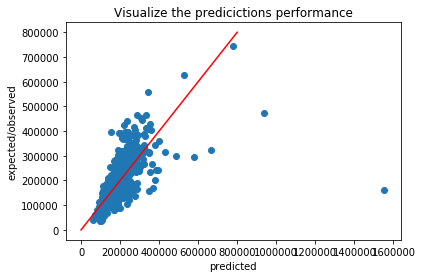

In [55]:
# plot the predicted vs the expected.  
# how well did the model perform
plt.plot([0,800000],[0,800000], color='red')
plt.title('Visualize the predicictions performance')
plt.xlabel('predicted')
plt.ylabel('expected/observed')
plt.scatter(predicted, expected)

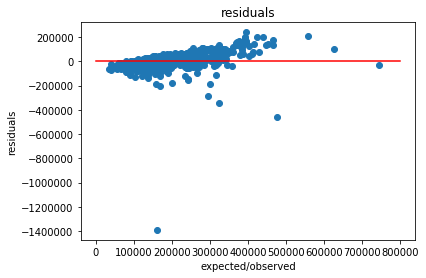

In [56]:
residuals = np.array(expected.values.ravel()) - np.array(predicted.values.ravel())
plt.title('residuals')
plt.xlabel('expected/observed')
plt.ylabel('residuals')
plt.plot([0,800000],[0,0], color='red')
plt.scatter(expected, residuals)
# a good residual plot does not have a pattern
# a pattern in the plot means we missed in capturing the data thats driving sale price

In [57]:
# do a preditction on the hold out data
predicted = np.exp(pd.DataFrame(model_lr.predict(X_hold_out[train_cols])))
predicted.head()

,0
0,179196.226177
1,134456.710829
2,111826.620461
3,176508.594275
4,229307.678455


In [58]:
expected = y_hold_out
expected.head()

222     179900
1130    135000
770     134900
1210    189000
1111    205000
Name: SalePrice, dtype: int64

In [59]:
if save_intermediate_work:
    predicted.to_csv('excluded/log-test-predicted-hold-out-lr.csv',index=False)
    pd.DataFrame(expected).to_csv('excluded/log-test-expected-hold-out.csv',index=False)

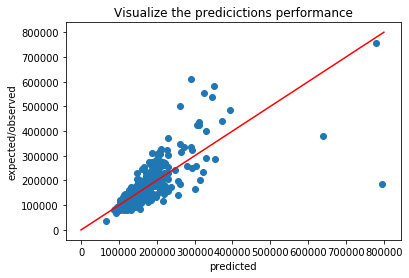

In [60]:
# plot the predicted vs the expected.  
# how well did the model perform
plt.plot([0,800000],[0,800000], color='red')
plt.title('Visualize the predicictions performance')
plt.xlabel('predicted')
plt.ylabel('expected/observed')
plt.scatter(predicted, expected)

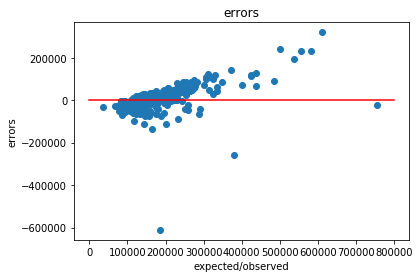

In [61]:
errors = np.array(expected.values.ravel()) - np.array(predicted.values.ravel())
plt.title('errors')
plt.xlabel('expected/observed')
plt.ylabel('errors')
plt.plot([0,800000],[0,0], color='red')
plt.scatter(expected, errors)
# a good residual plot does not have a pattern
# a pattern in the plot means we missed in capturing the data thats driving sale price

In [62]:
y_train.head()

841     157500
124     181000
213     156000
577     164500
1226    214000
Name: SalePrice, dtype: int64

In [63]:
# Fit a random forest
model_rf = RandomForestRegressor(random_state=9261774, n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=None, bootstrap=False)
model_rf.fit(X_train[train_cols], y_train)


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=9261774,
                      verbose=0, warm_start=False)

In [64]:
train_score_rf=model_rf.score(X_train[train_cols], y_train)
train_score_rf

0.9992725013173155

In [65]:
X_hold_out[train_cols].head()

,LotFrontage,GrLivArea,OverallQualCond
222,85.000000,1552,49
1130,65.000000,1981,20
770,70.049958,858,36
1210,70.000000,1845,42
1111,80.000000,1964,56


In [66]:
hold_out_score_rf=model_rf.score(X_hold_out[train_cols], y_hold_out)
hold_out_score_rf

0.6665211283913351

In [67]:
# run the training data through the predict to get the residuals
predicted = pd.DataFrame(model_rf.predict(X_train[train_cols]))
predicted.head()

,0
0,157500.0
1,181000.0
2,156000.0
3,164500.0
4,214000.0


In [68]:
expected = y_train
expected.head()

841     157500
124     181000
213     156000
577     164500
1226    214000
Name: SalePrice, dtype: int64

In [69]:
if save_intermediate_work:
    predicted.to_csv('excluded/log-test-predicted-train-rf.csv',index=False)

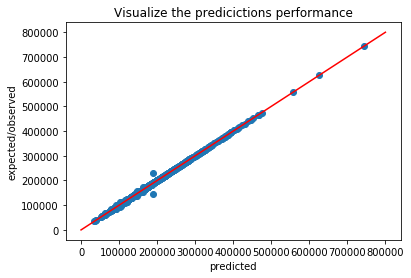

In [70]:
# plot the predicted vs the expected.  
# how well did the model perform
plt.plot([0,800000],[0,800000], color='red')
plt.title('Visualize the predicictions performance')
plt.xlabel('predicted')
plt.ylabel('expected/observed')
plt.scatter(predicted, expected)

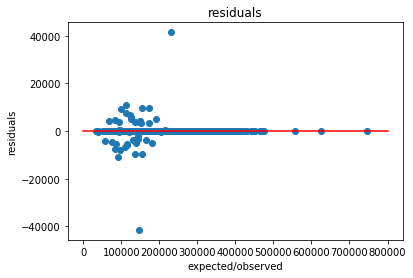

In [71]:
residuals = np.array(expected.values.ravel()) - np.array(predicted.values.ravel())
plt.title('residuals')
plt.xlabel('expected/observed')
plt.ylabel('residuals')
plt.plot([0,800000],[0,0], color='red')
plt.scatter(expected, residuals)
# a good residual plot does not have a pattern
# a pattern in the plot means we missed in capturing the data thats driving sale price

In [72]:
# do a preditction on the hold out data
predicted = pd.DataFrame(model_rf.predict(X_hold_out[train_cols]))
# put 
expected = y_hold_out

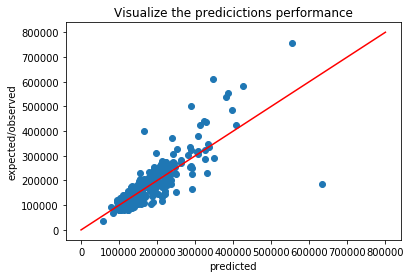

In [73]:
# plot the predicted vs the expected.  
# how well did the model perform
plt.plot([0,800000],[0,800000], color='red')
plt.title('Visualize the predicictions performance')
plt.xlabel('predicted')
plt.ylabel('expected/observed')
plt.scatter(predicted, expected)

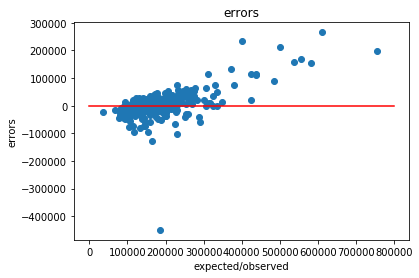

In [74]:
errors = np.array(expected.values.ravel()) - np.array(predicted.values.ravel())
plt.title('errors')
plt.xlabel('expected/observed')
plt.ylabel('errors')
plt.plot([0,800000],[0,0], color='red')
plt.scatter(expected, errors)
# a good residual plot does not have a pattern
# a pattern in the plot means we missed in capturing the data thats driving sale price

In [75]:
###
### proceed past this point when ready to make a prediction
###

In [76]:
X_submission[train_cols].describe()

,LotFrontage,GrLivArea,OverallQualCond
count,1459.000000,1459.000000,1459.000000
mean,68.704365,1486.045922,46.239890
std,20.563259,485.566099,10.865812
min,21.000000,407.000000,6.000000
25%,60.000000,1117.500000,42.000000
50%,69.377392,1432.000000,48.000000
75%,78.000000,1721.000000,54.000000
max,200.000000,5095.000000,90.000000


In [77]:
# for the vars we are about to use in the predict cal, are there any NaN(s)?
X_submission[train_cols].isna().any()


LotFrontage        False
GrLivArea          False
OverallQualCond    False
dtype: bool

In [78]:
### lr predict 
lr_submission_df = X_submission[['Id']]
lr_prediction_y=np.exp(model_lr.predict(X_submission[train_cols]))
# tack the saved predictions onto the preds into a data frame
lr_pred_df=pd.DataFrame(lr_prediction_y, columns=['SalePrice'])
lr_submission_df = pd.concat([lr_submission_df,lr_pred_df], axis='columns', sort=False)


In [79]:
lr_submission_df.shape

(1459, 2)

In [80]:
lr_submission_df.head()

,Id,SalePrice
0,1461,125667.981692
1,1462,163709.055444
2,1463,150360.475599
3,1464,180614.736296
4,1465,162074.704755


In [81]:
### save submission file
lr_submission_df.to_csv('excluded/_log-test-submission-lr.csv',index=False)

In [82]:
### rf predict 
rf_submission_df = X_submission[['Id']]
rf_prediction_y=model_rf.predict(X_submission[train_cols])
# tack the saved predictions onto the preds into a data frame
rf_pred_df=pd.DataFrame(rf_prediction_y, columns=['SalePrice'])
rf_submission_df = pd.concat([rf_submission_df,rf_pred_df], axis='columns', sort=False)


In [83]:
rf_submission_df.shape

(1459, 2)

In [84]:
rf_submission_df.head()

,Id,SalePrice
0,1461,129767.62
1,1462,169977.94
2,1463,146139.00
3,1464,163901.00
4,1465,191180.00


In [85]:
### save submission file
rf_submission_df.to_csv('excluded/_log-test-submission-rf.csv',index=False)


In [86]:
lr_rf_submission_df = pd.concat([lr_submission_df,rf_pred_df], axis='columns', sort=False)

In [87]:
lr_rf_submission_df.columns=['Id', 'SalePrice_LR','SalePrice_RF']

lr_rf_submission_df.head()

,Id,SalePrice_LR,SalePrice_RF
0,1461,125667.981692,129767.62
1,1462,163709.055444,169977.94
2,1463,150360.475599,146139.00
3,1464,180614.736296,163901.00
4,1465,162074.704755,191180.00


In [88]:
lr_rf_submission_df['SalePrice'] = (lr_rf_submission_df['SalePrice_LR'] * 0.50) + (lr_rf_submission_df['SalePrice_RF'] * 0.50)
lr_rf_submission_df.head()

,Id,SalePrice_LR,SalePrice_RF,SalePrice
0,1461,125667.981692,129767.62,127717.800846
1,1462,163709.055444,169977.94,166843.497722
2,1463,150360.475599,146139.00,148249.737799
3,1464,180614.736296,163901.00,172257.868148
4,1465,162074.704755,191180.00,176627.352377


In [89]:
lr_rf_submission_df.drop('SalePrice_LR', axis=1, inplace=True)
lr_rf_submission_df.drop('SalePrice_RF', axis=1, inplace=True)
lr_rf_submission_df.head()

,Id,SalePrice
0,1461,127717.800846
1,1462,166843.497722
2,1463,148249.737799
3,1464,172257.868148
4,1465,176627.352377


In [90]:
lr_rf_submission_df.to_csv('excluded/_log-test-submission-lr-rf.csv',index=False)

In [91]:
# the above code received a kaggle score of 
#
#   0.28700  train_cols = ['LotFrontage','GrLivArea'] - lr
#
#   non-log(SalePrice)
#   0.24117  train_cols = ['LotFrontage','GrLivArea','OverallQualCond'] - lr
#   0.22596  train_cols = ['LotFrontage','GrLivArea','OverallQualCond'] - rf
#   0.21537  train_cols = ['LotFrontage','GrLivArea','OverallQualCond'] - ensemble lr+rf
#
#   with a log(SalePrice)
#   0.24379  train_cols = ['LotFrontage','GrLivArea','OverallQualCond'] - lr
#   0.22596  train_cols = ['LotFrontage','GrLivArea','OverallQualCond'] - rf
#   0.21949  train_cols = ['LotFrontage','GrLivArea','OverallQualCond'] - ensemble lr+rf


# More data analysis needed
# Practically every independent variable in this dataset is useful
# there are a few variablex that have excessive NaN(s), probably best to drop the variables
# Create combined columns, ex total bathroom count, total overall condition score
# Separate the "categorical" type columns into numeric categoricals and one hot encoded variables
# create additional models and ensemble them together
#    model_rf = RandomForestRegressor(random_state=9261774, n_estimators=400, ...
#    model_gb = GradientBoostingRegressor(random_state=9261774,learning_rate=0.025,...
#    ...
#    submission_lr_rf_gb['SalePrice']=(
#        submission_lr_rf_gb['SalePrice_LR'] * 0.20 +
#        submission_lr_rf_gb['SalePrice_RF'] * 0.30 +
#        submission_lr_rf_gb['SalePrice_GB'] * 0.50 )
# 
# my best score, with a few days of data cleaning/feature engineering
#
# 0.12593
# 1744/5749